In [1]:
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator
from math import ceil 

from ansys.heart.postprocessor.EPpostprocessor import EPpostprocessor

2024/01/10 11:03:38 - DEBUG - pyheart_global - __init__ - <module> - Loaded logging module as LOG


In [2]:
# ECG Visualization (code from Karim)
def _ax_plot(ax, x, y, secs=10, lwidth=0.5, amplitude_ecg=1.8, time_ticks=0.2):
    ax.set_xticks(np.arange(0, 11, time_ticks))    
    ax.set_yticks(np.arange(-ceil(amplitude_ecg), ceil(amplitude_ecg), 1.0))
    ax.minorticks_on()
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.set_ylim(-amplitude_ecg, amplitude_ecg)
    ax.set_xlim(0, secs)
    ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
    ax.grid(which='minor', linestyle='-', linewidth='0.5', color=(1, 0.7, 0.7))
    ax.plot(x, y, linewidth=lwidth)

def plot_1(ecg, sample_rate=500, title='ECG', fig_width=6, fig_height=2, line_w=1, ecg_amp=1.8, timetick=0.2, save_path=None):
    """Plot multi lead ECG chart.
    # Arguments
        ecg        : m x n ECG signal data, which m is number of leads and n is length of signal.
        sample_rate: Sample rate of the signal.
        title      : Title which will be shown on top off chart
        fig_width  : The width of the plot
        fig_height : The height of the plot
    """
    plt.figure(figsize=(fig_width,fig_height))
    plt.suptitle(title)
    plt.subplots_adjust(
        hspace = 0, 
        wspace = 0.04,
        left   = 0.04,  # the left side of the subplots of the figure
        right  = 0.98,  # the right side of the subplots of the figure
        bottom = 0.2,   # the bottom of the subplots of the figure
        top    = 0.88
        )
    seconds = len(ecg)/sample_rate

    ax = plt.subplot(1, 1, 1)
    #plt.rcParams['lines.linewidth'] = 5
    step = 1.0/sample_rate
    _ax_plot(ax,np.arange(0,len(ecg)*step,step),ecg, seconds, line_w, ecg_amp,timetick)

    if save_path:
        plt.savefig(save_path, dpi=300)

def extract_lead_II(file_path):
    '''Extract lead II signal potential from ECG results'''
    ECG = np.loadtxt(file_path, comments=['$', '*'], skiprows=4)[:, 0:11]
    VRA = ECG[:, 7]
    VLL = ECG[:, 10]
    Lead_II = VLL - VRA

    return Lead_II


In [19]:
__file__ = r'D:\xuhu\pyansys-heart\examples\simulator\ECG_postprocessor.ipynb'

workdir = Path(
    Path(__file__).resolve().parents[2], "downloads", "Strocchi2020", "01", "Biv_raw"
)

# Read DoE points
param_file_path = r'D:\xuhu\pyansys-heart\examples\simulator\two_parameter_combinations150.csv'
parameters_df = pd.read_csv(param_file_path)
parameters_df

,sigmaX,Ratio2
0,1.953201,8.218844
1,1.180131,5.522553
2,0.886647,6.813840
3,1.897374,8.354807
4,0.290531,1.176139
...,...,...
145,1.815089,2.422246
146,1.987736,3.770140
147,0.546413,8.184624
148,1.367787,6.117420


In [21]:
# Initialization for output dataset
columns = ['LeadII', 'sigmaX', 'ratio2']
df = pd.DataFrame(columns=columns)

1.95 _ 8.21  Total activation time: 22.0 ms
1.18 _ 5.52  Total activation time: 153.0 ms
0.88 _ 6.81  Total activation time: 160.0 ms
1.89 _ 8.35  Total activation time: 28.0 ms
0.29 _ 1.17  Total activation time: 250.0 ms
1.47 _ 7.80  Total activation time: 149.0 ms
0.26 _ 9.09  Total activation time: 236.0 ms
1.00 _ 7.15  Total activation time: 151.0 ms
0.58 _ 1.89  Total activation time: 209.0 ms
1.76 _ 3.02  Total activation time: 167.0 ms
0.76 _ 1.73  Total activation time: 197.0 ms
1.39 _ 1.00  Total activation time: 213.0 ms
0.47 _ 8.83  Total activation time: 189.0 ms
1.03 _ 7.66  Total activation time: 151.0 ms
1.57 _ 8.94  Total activation time: 142.0 ms
1.14 _ 7.60  Total activation time: 152.0 ms
0.80 _ 5.64  Total activation time: 170.0 ms
1.07 _ 2.86  Total activation time: 172.0 ms
1.23 _ 1.50  Total activation time: 187.0 ms
0.79 _ 3.41  Total activation time: 183.0 ms
1.67 _ 2.00  Total activation time: 169.0 ms
0.83 _ 1.21  Total activation time: 197.0 ms
0.90 _ 6.60 

C:\Users\xuhu\AppData\Local\Temp\ipykernel_507776\3119372408.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(fig_width,fig_height))


0.31 _ 8.12  Total activation time: 217.0 ms
0.48 _ 6.20  Total activation time: 193.0 ms
0.45 _ 4.11  Total activation time: 211.0 ms
0.86 _ 7.94  Total activation time: 157.0 ms
0.55 _ 2.80  Total activation time: 209.0 ms
1.45 _ 6.03  Total activation time: 153.0 ms
0.93 _ 9.52  Total activation time: 155.0 ms
1.34 _ 9.42  Total activation time: 149.0 ms
0.43 _ 1.92  Total activation time: 225.0 ms
1.87 _ 6.42  Total activation time: 32.0 ms
1.14 _ 4.57  Total activation time: 158.0 ms
0.96 _ 5.92  Total activation time: 159.0 ms
0.34 _ 2.76  Total activation time: 235.0 ms
1.41 _ 5.82  Total activation time: 157.0 ms
0.91 _ 8.26  Total activation time: 156.0 ms
0.97 _ 7.97  Total activation time: 153.0 ms
0.24 _ 8.54  Total activation time: 237.0 ms
1.58 _ 7.19  Total activation time: 150.0 ms
0.74 _ 5.90  Total activation time: 173.0 ms
1.35 _ 1.62  Total activation time: 195.0 ms
1.78 _ 2.44  Total activation time: 173.0 ms
1.59 _ 8.05  Total activation time: 149.0 ms
0.67 _ 7.72

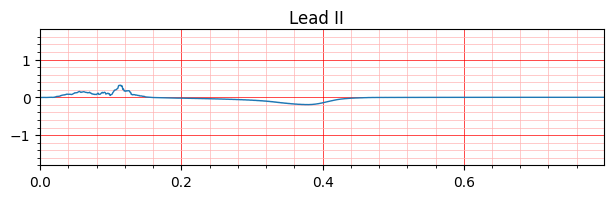

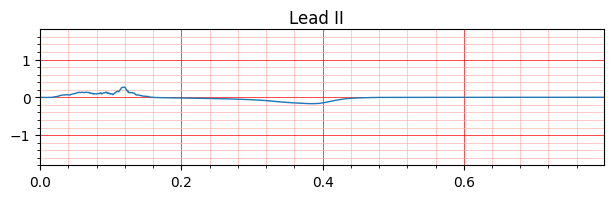

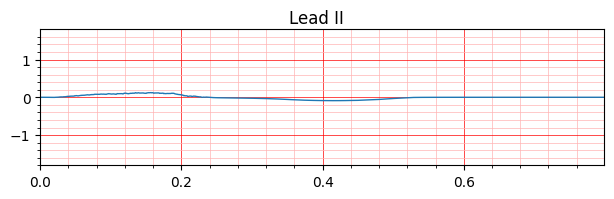

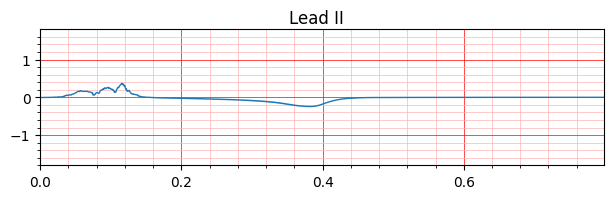

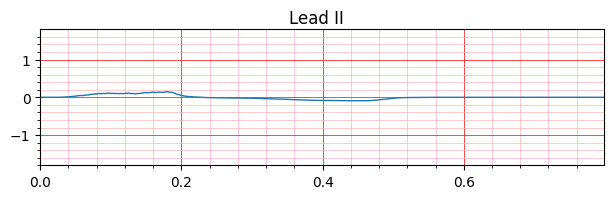

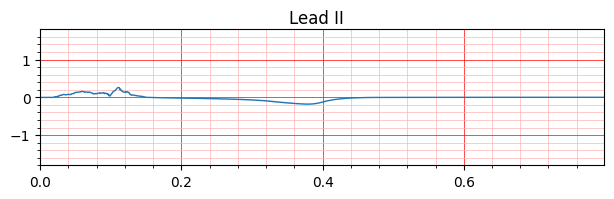

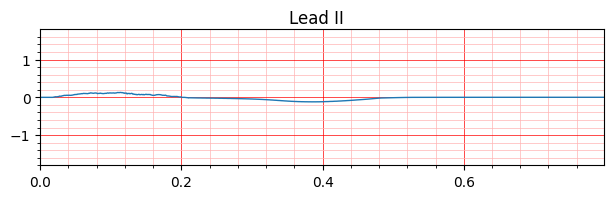

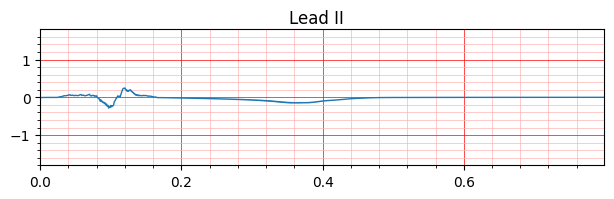

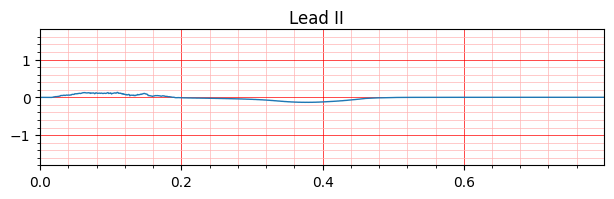

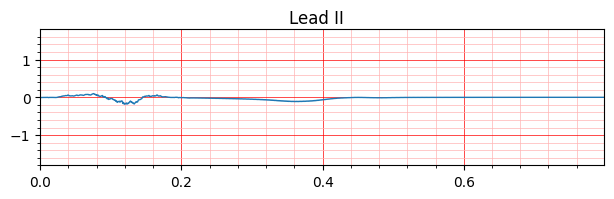

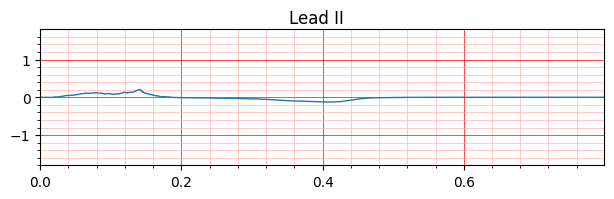

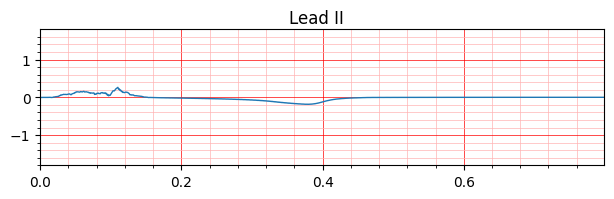

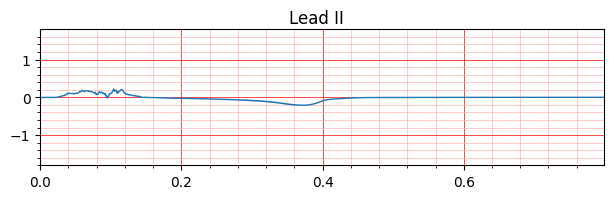

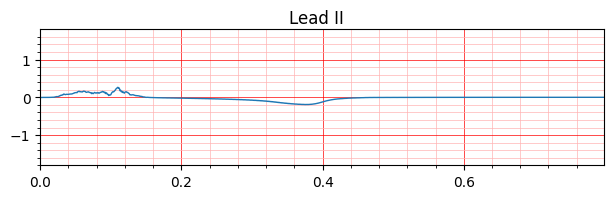

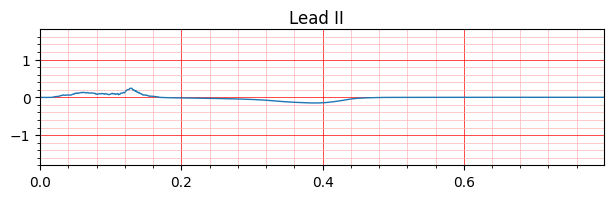

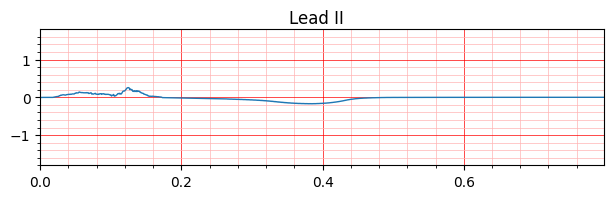

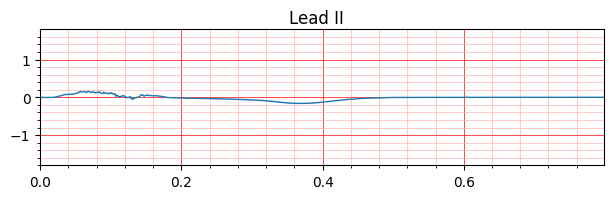

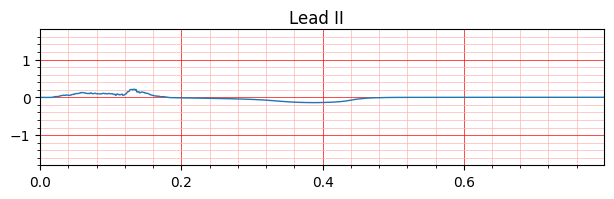

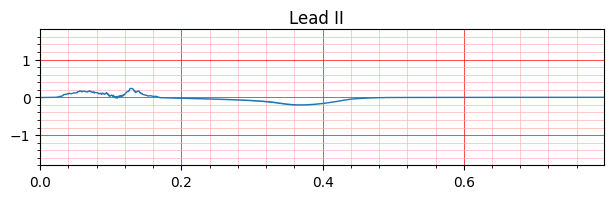

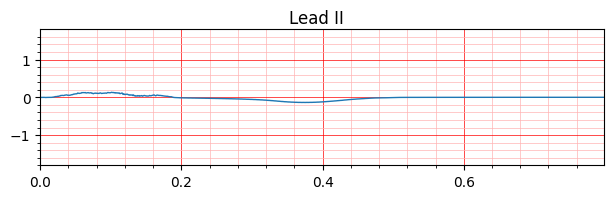

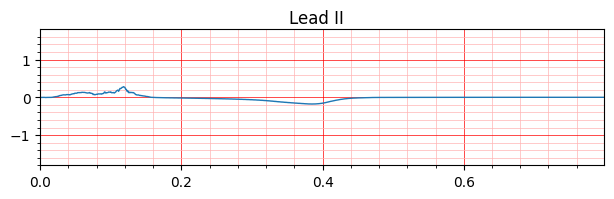

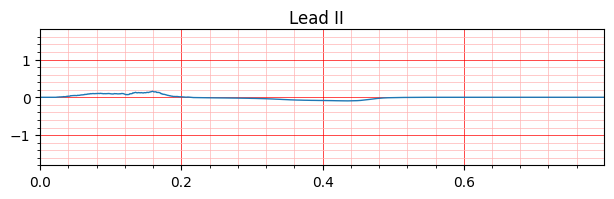

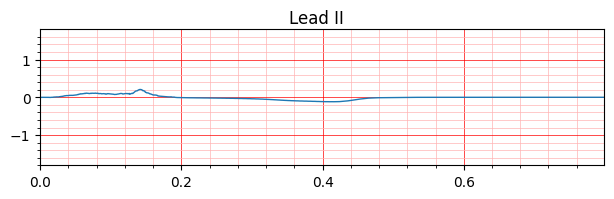

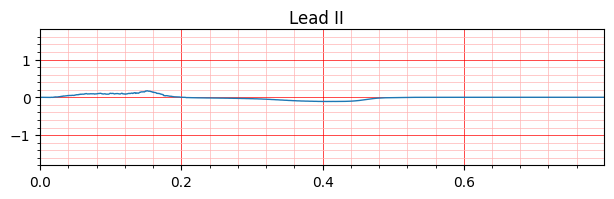

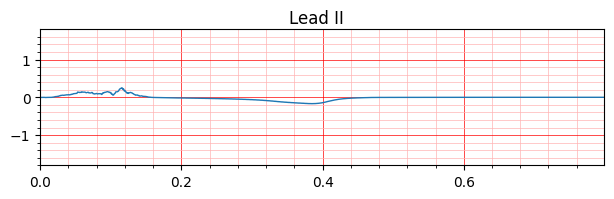

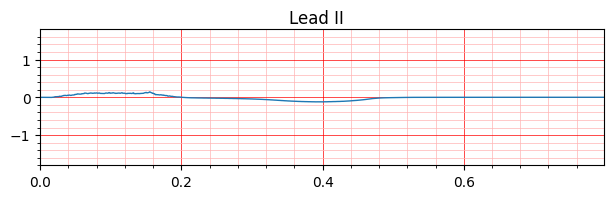

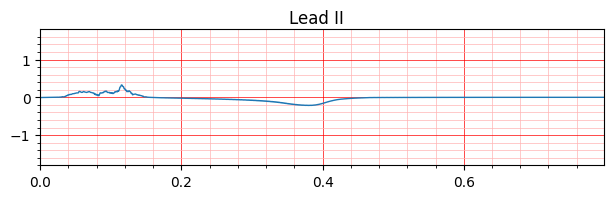

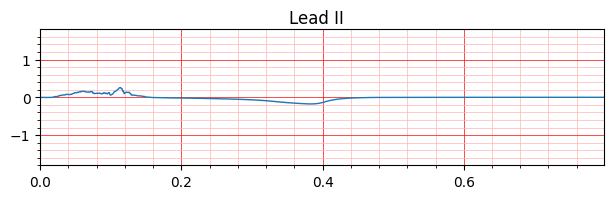

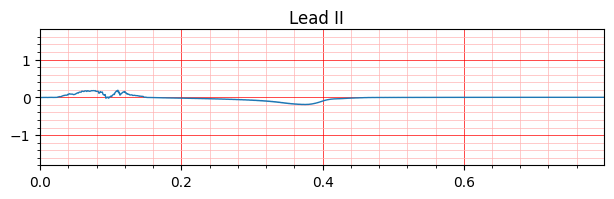

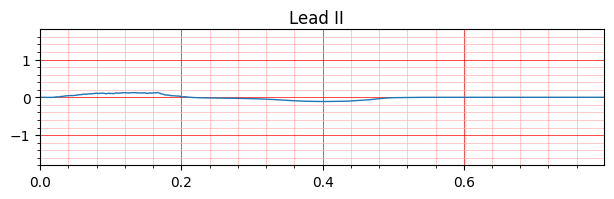

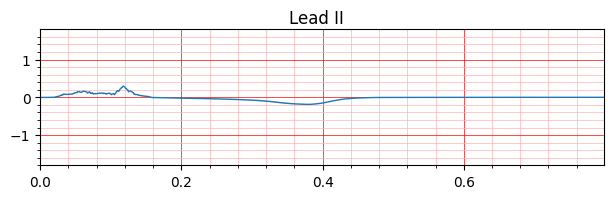

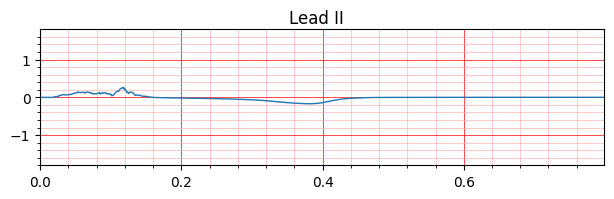

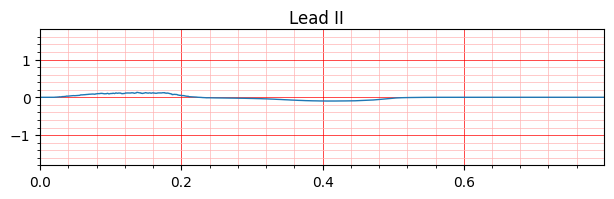

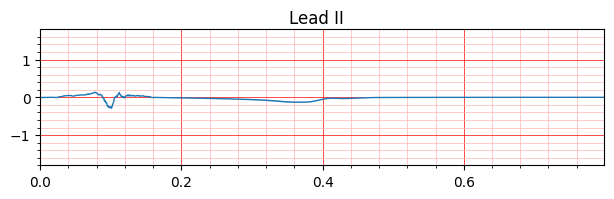

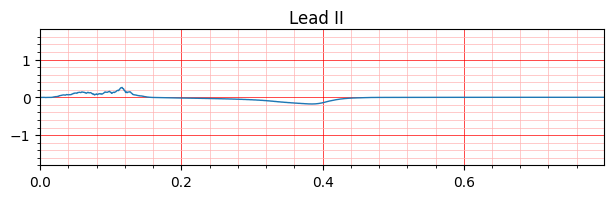

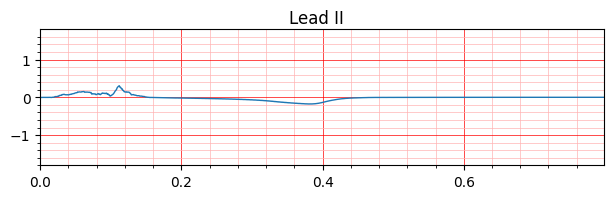

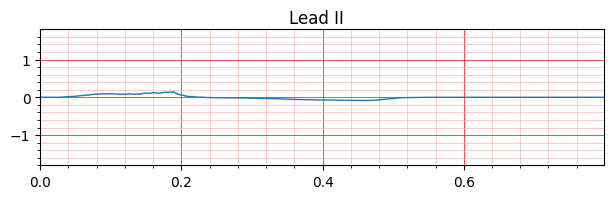

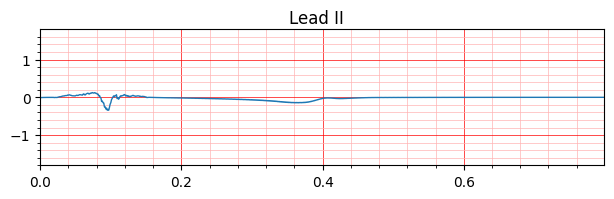

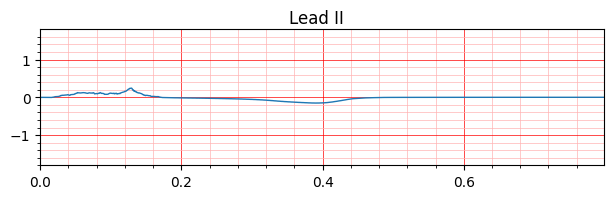

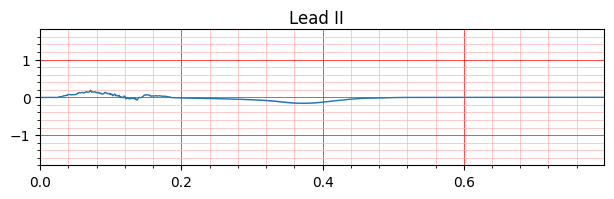

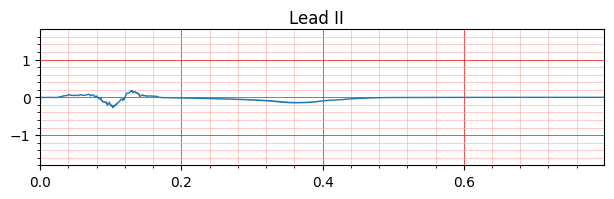

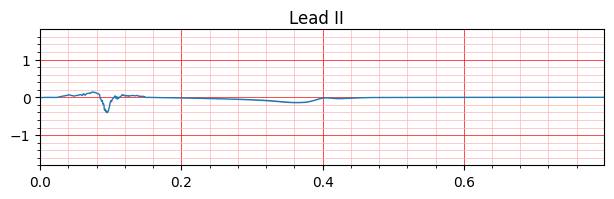

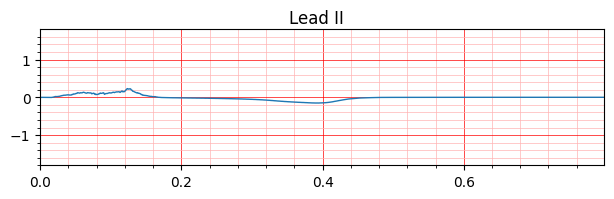

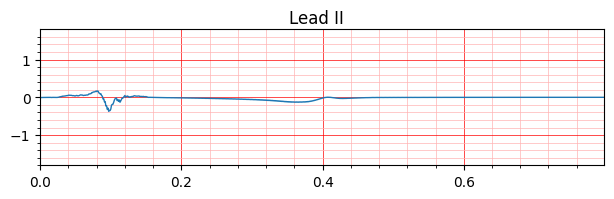

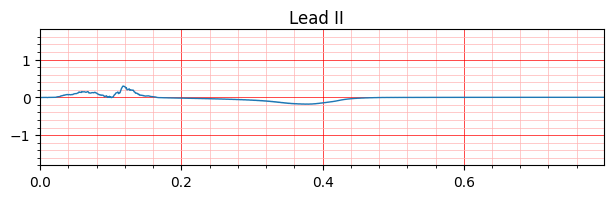

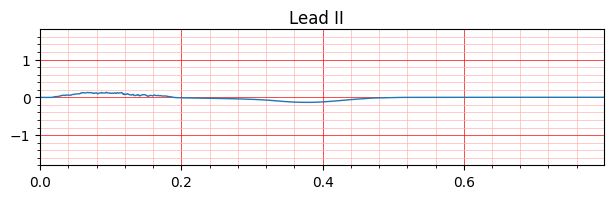

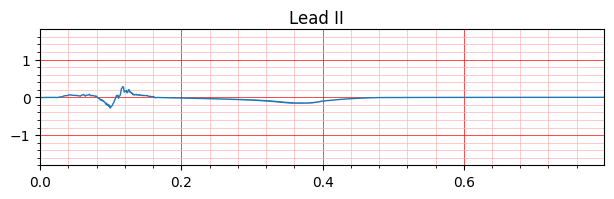

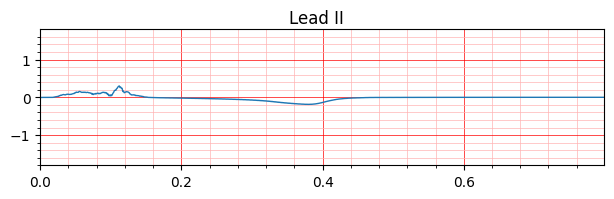

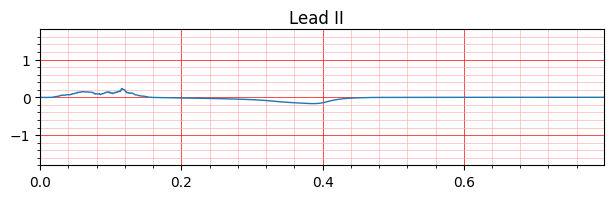

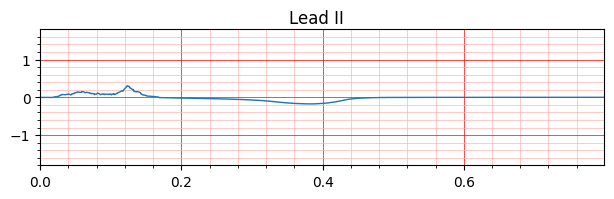

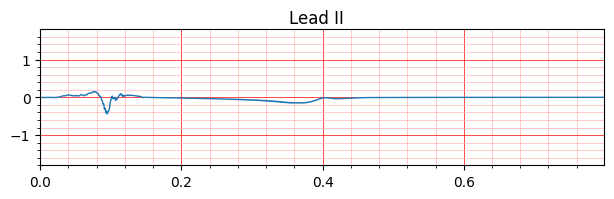

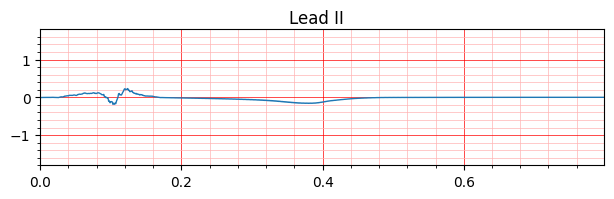

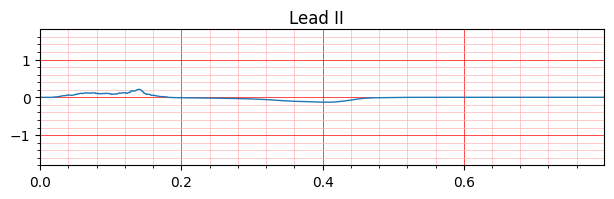

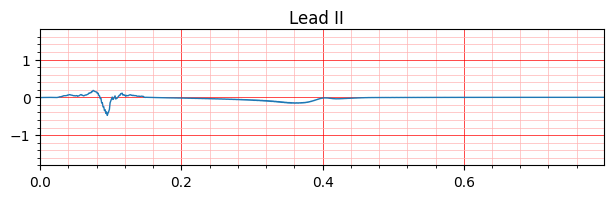

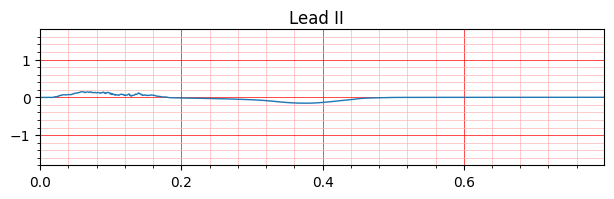

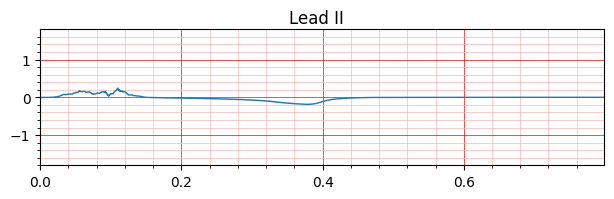

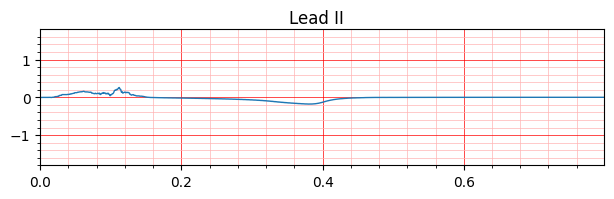

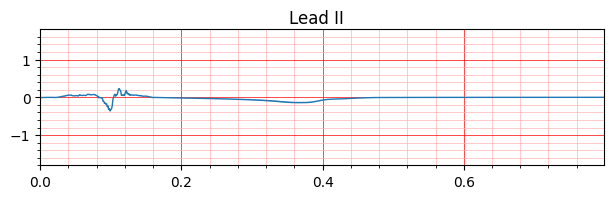

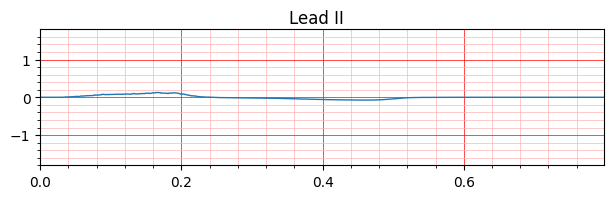

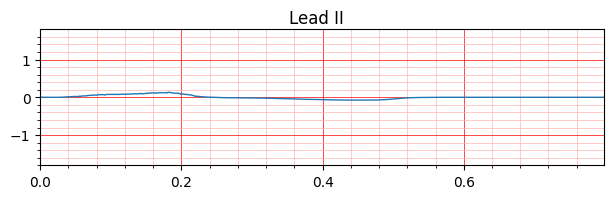

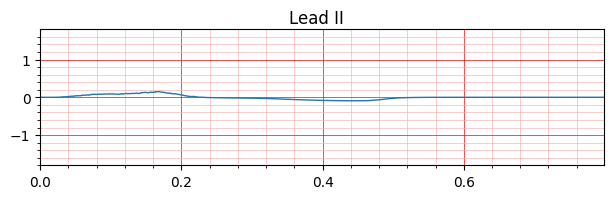

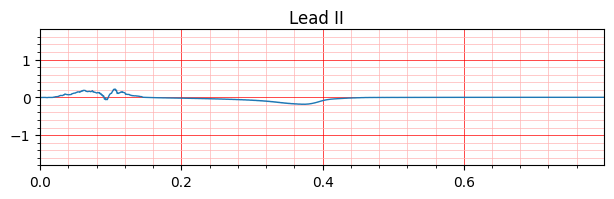

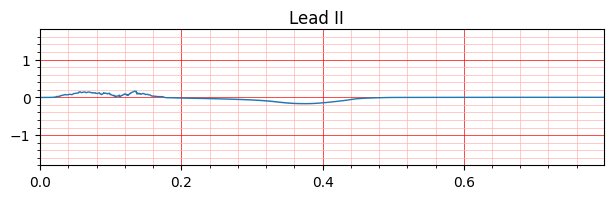

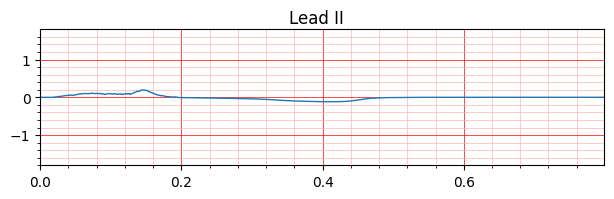

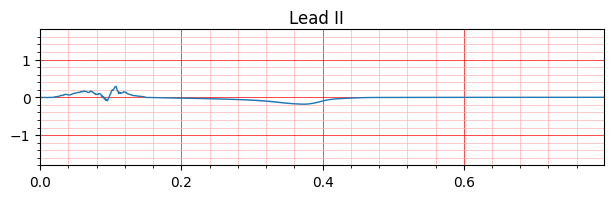

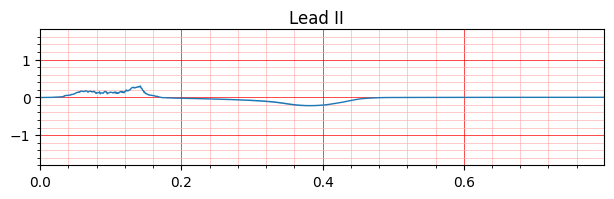

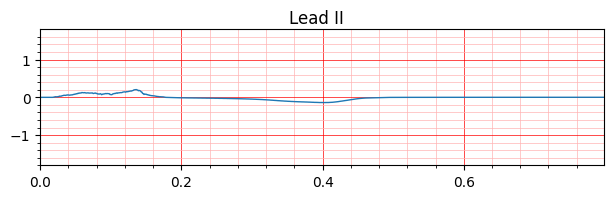

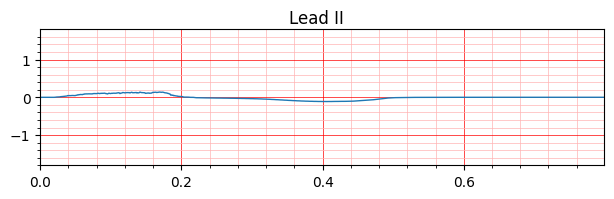

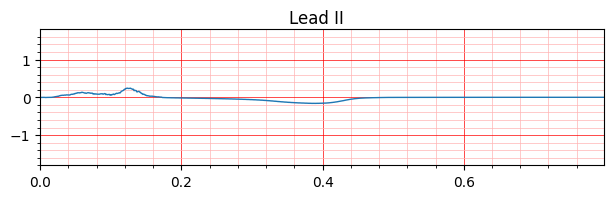

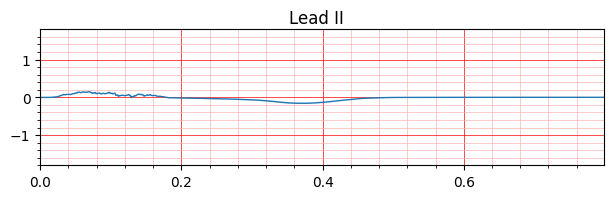

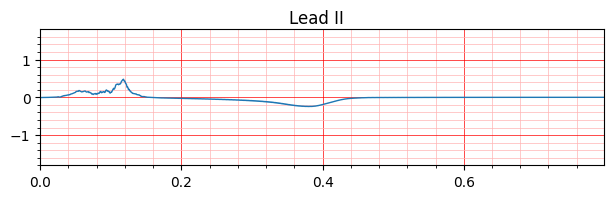

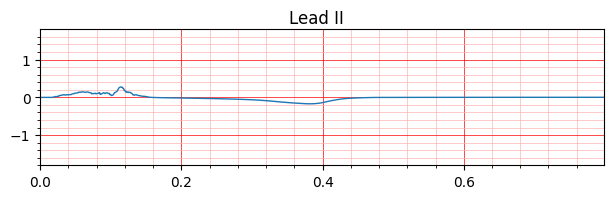

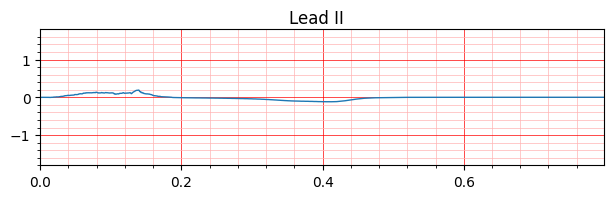

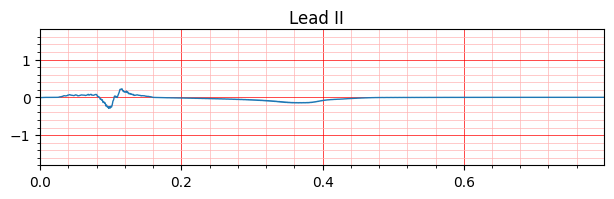

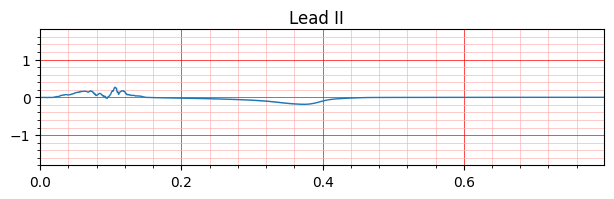

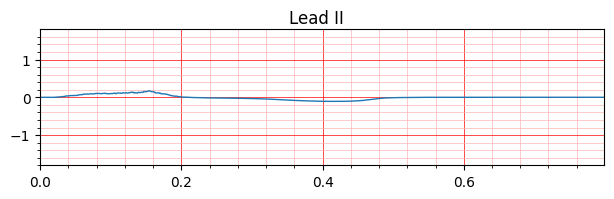

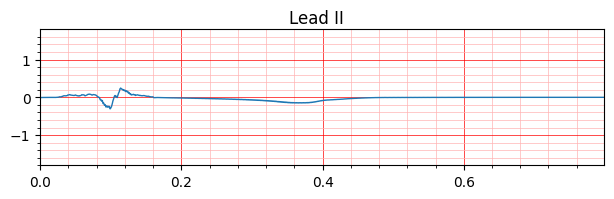

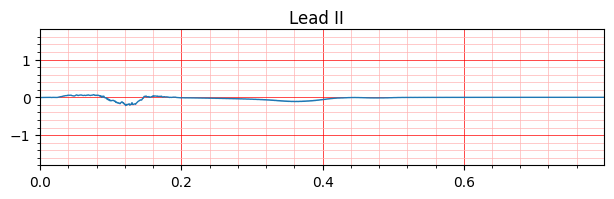

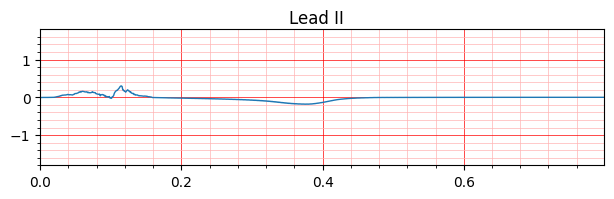

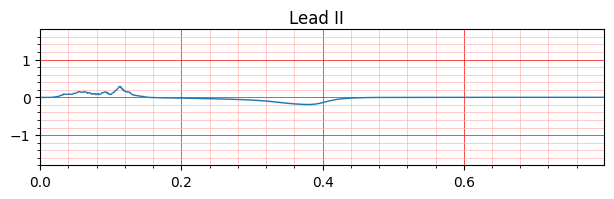

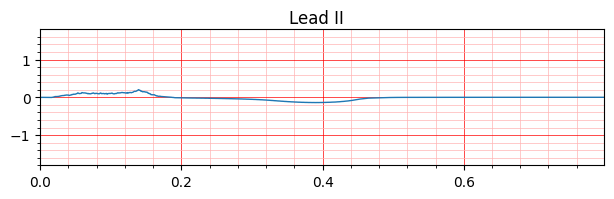

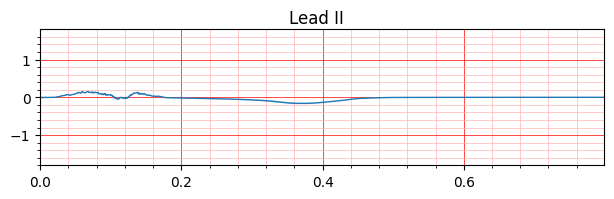

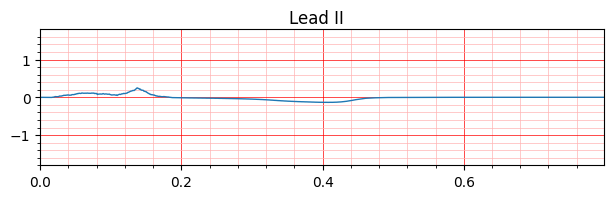

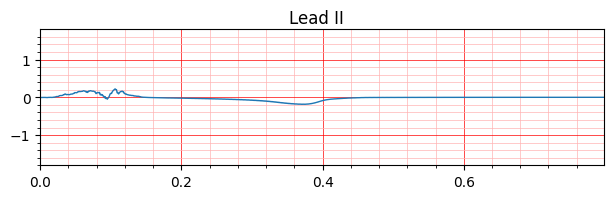

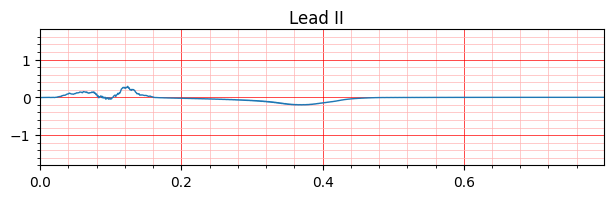

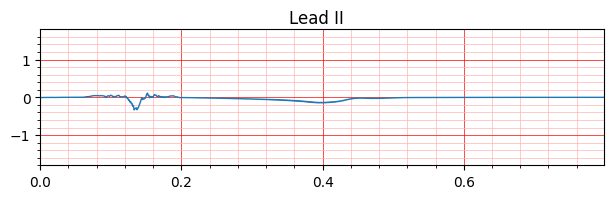

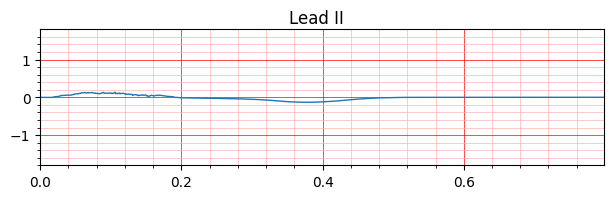

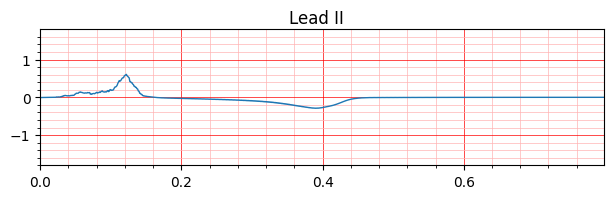

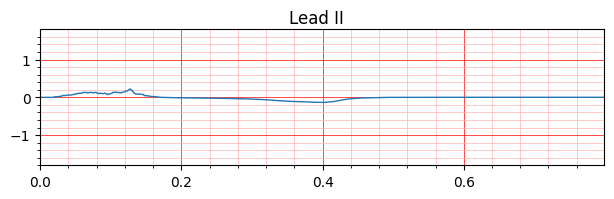

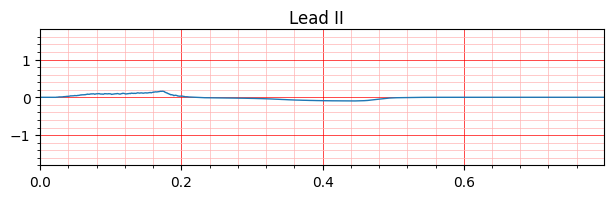

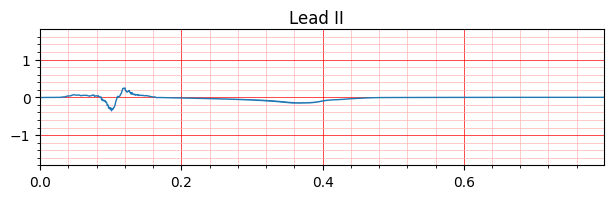

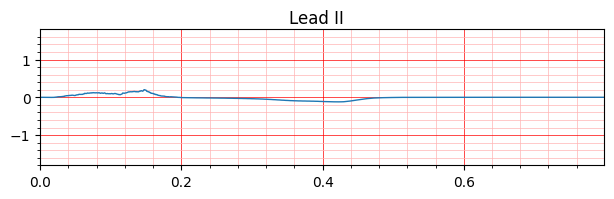

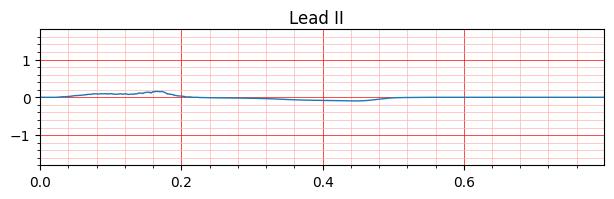

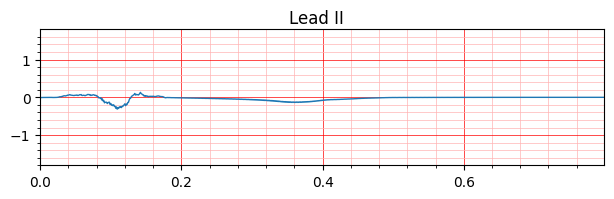

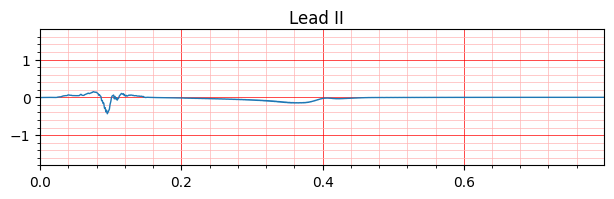

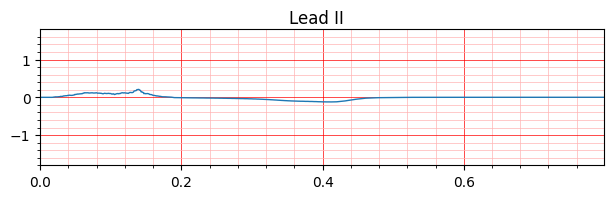

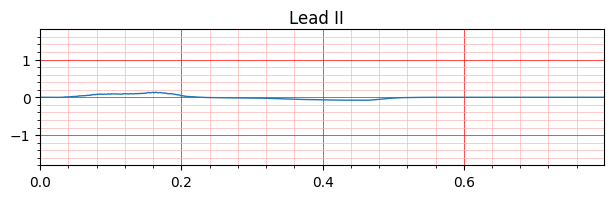

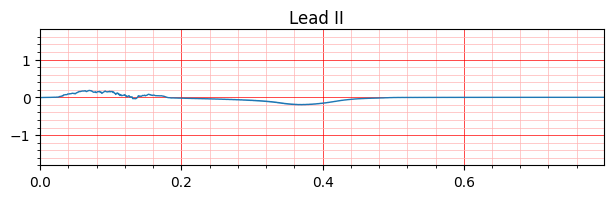

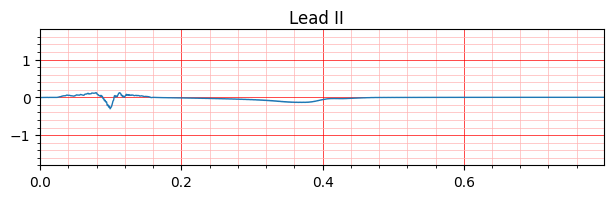

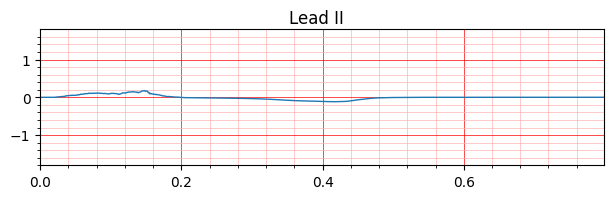

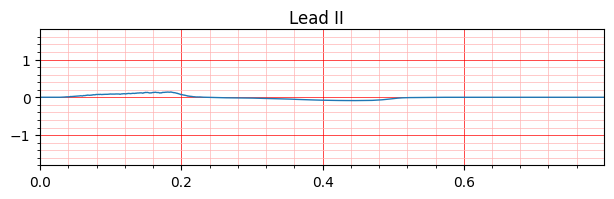

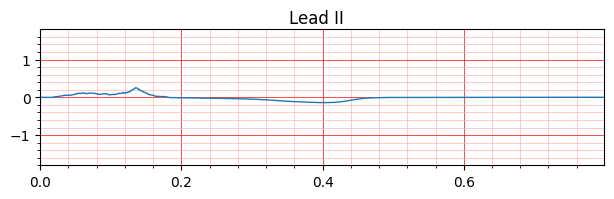

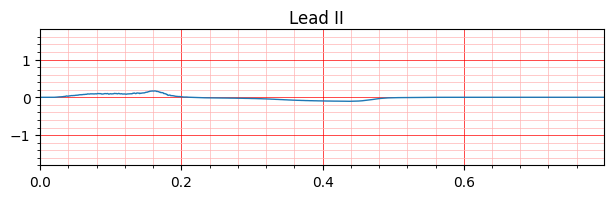

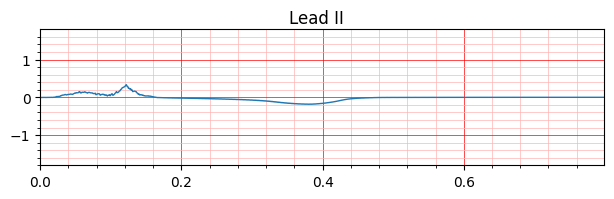

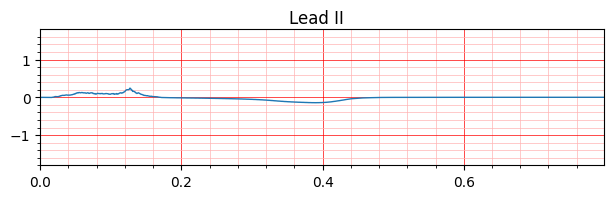

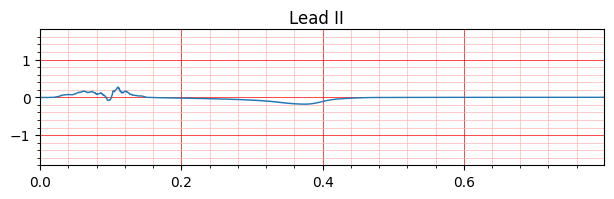

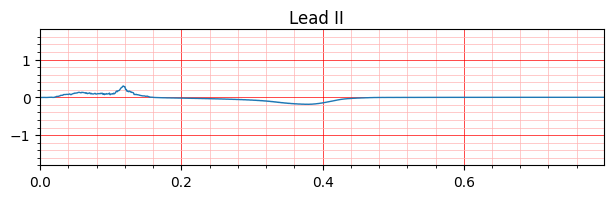

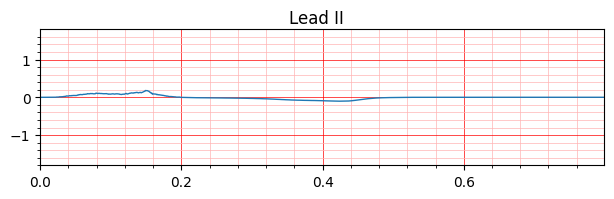

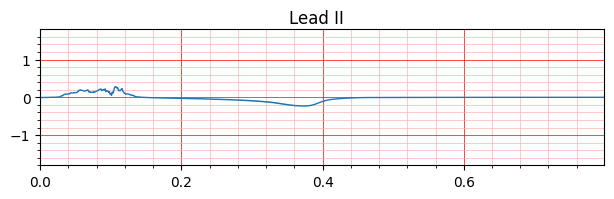

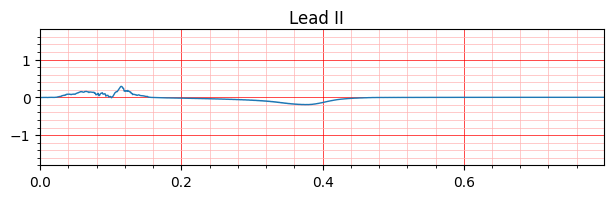

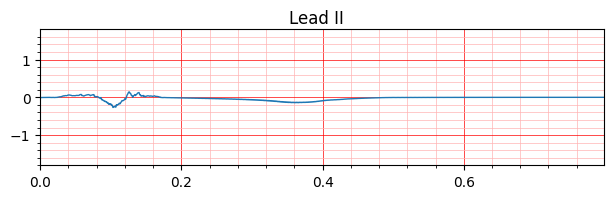

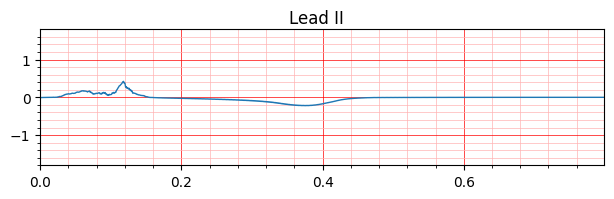

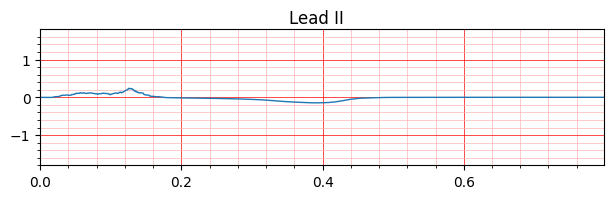

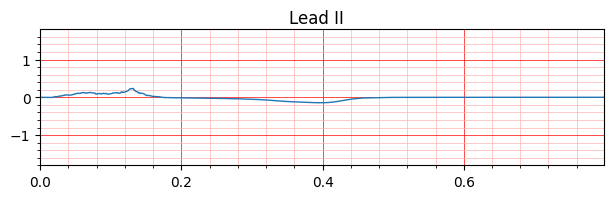

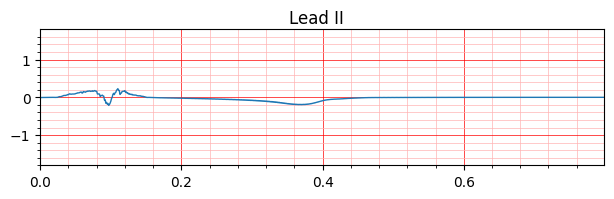

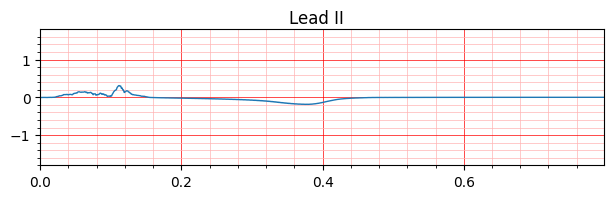

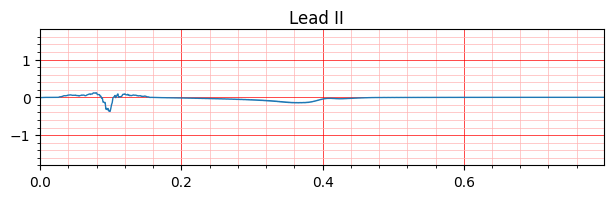

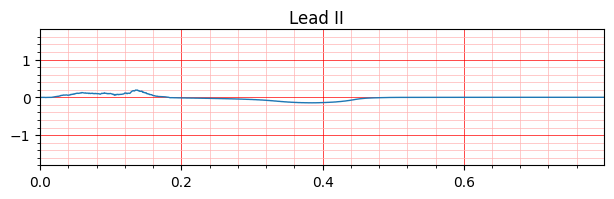

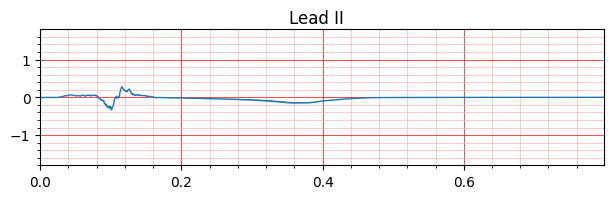

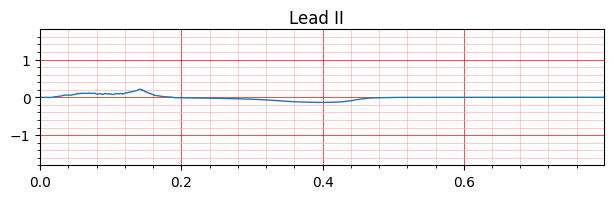

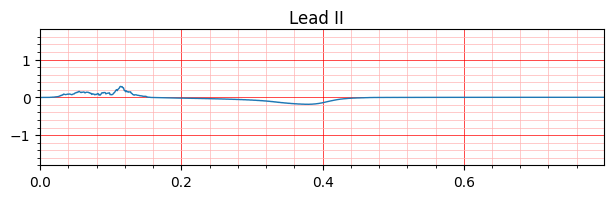

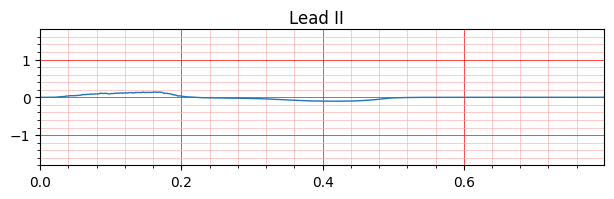

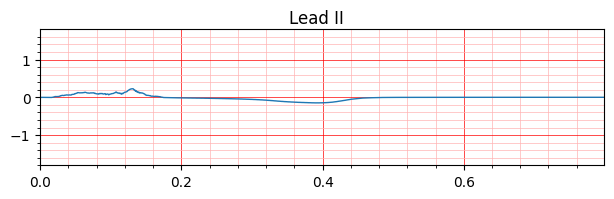

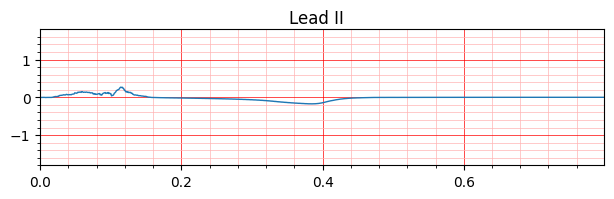

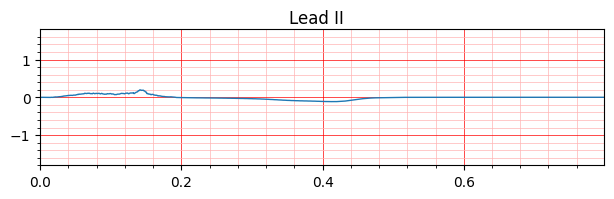

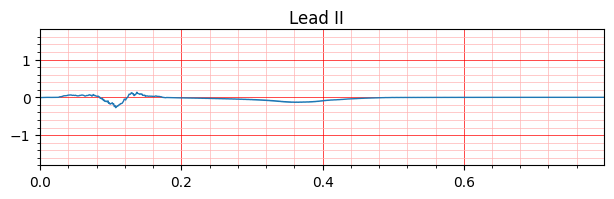

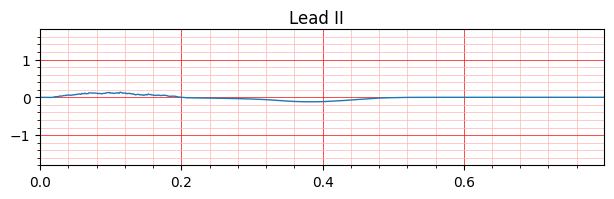

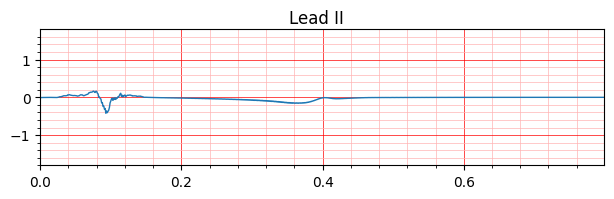

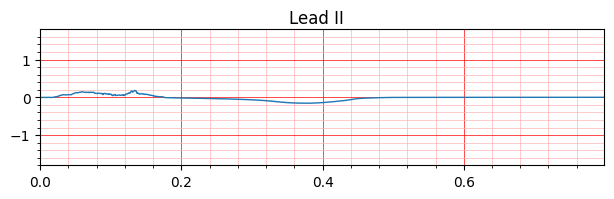

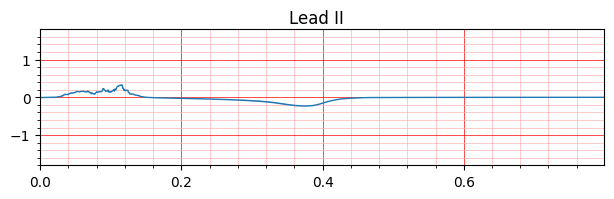

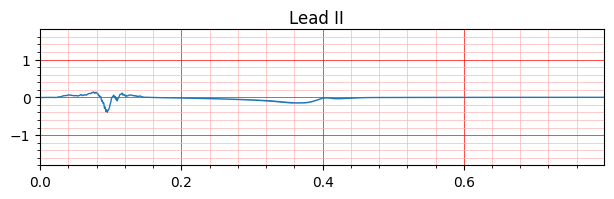

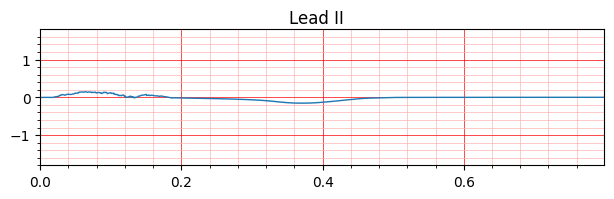

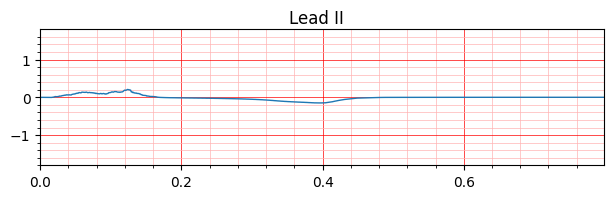

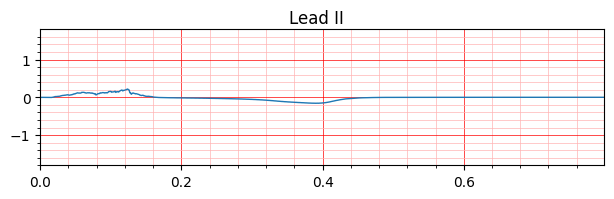

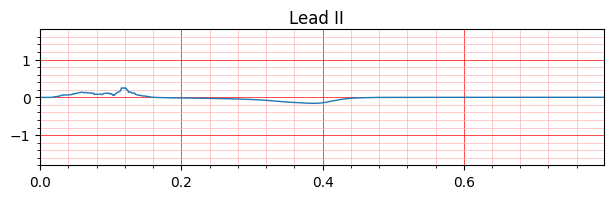

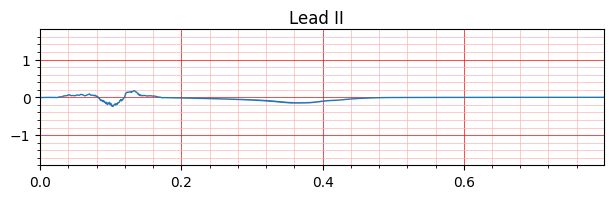

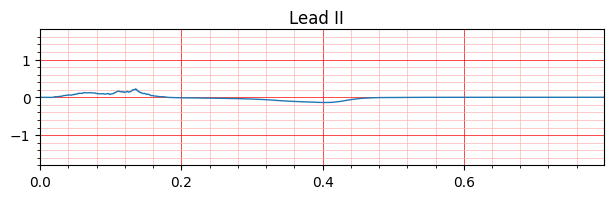

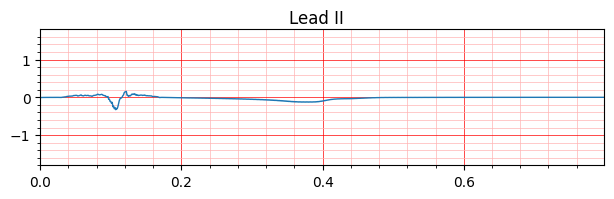

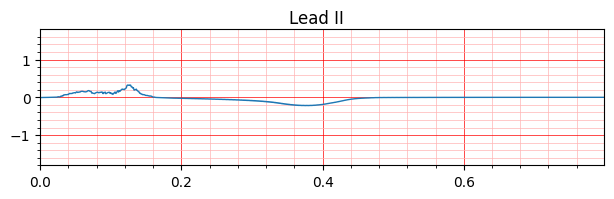

In [10]:
for index, row_data in parameters_df.iterrows():
    # scenario folder
    my_simulation_directory = os.path.join(
        workdir, 
        "simulation-EP",
        str(row_data["sigmaX"])[:4]
        + "_"
        + str(row_data["Ratio2"])[:4],
    )
    # ep results folder
    ep_folder = os.path.join(
        my_simulation_directory,
        "d3plot",
    )
    # ecg results folder
    ecg_result_name = os.path.join(
        my_simulation_directory,
        "em_EKG_001.dat",
    )
    # ecg result image
    lead_II_save_name = os.path.join(
        my_simulation_directory,
        "Lead_II.png",
    )

    # get activation times
    postproc = EPpostprocessor(results_path=ep_folder)
    activation_time_field = postproc.get_activation_times()
    # activation_time_field.plot(show_edges=False)
    
    activation_time_data = activation_time_field.data_as_list
    total_acctivation_time = max(activation_time_data) - min(activation_time_data)
    
    print(
        str(row_data["sigmaX"])[:4]
        + " _ "
        + str(row_data["Ratio2"])[:4]
        +"  Total activation time: " 
        + str(total_acctivation_time)
        +" ms")
    
    if total_acctivation_time>=40:
        # keep scenario
        # ECGs = postproc.read_ECGs(ecg_result_name)
        lead_II = extract_lead_II(ecg_result_name)
        plot_1(
            10*lead_II, 
            sample_rate = 1000, 
            line_w=1, 
            title = 'Lead II', 
            save_path=lead_II_save_name
        )
        sigmaX = row_data["sigmaX"]
        ratio2 = row_data["Ratio2"]
        
        # Create dataset for training model
        # data = {'lead_II': lead_II, 'sigmaX': sigmaX, 'ratio2': ratio2}
        df = df.append({'LeadII': lead_II, 'sigmaX': sigmaX, 'ratio2': ratio2}, ignore_index=True)



In [11]:
dataset_save_name = os.path.join(
    workdir,
    'dataset_40.csv',
)
df.to_csv(dataset_save_name, index=False)